In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path= "C:\\Users\\hp\\Desktop\\"
df= pd.read_csv(path + "popularity_score_dataset.csv")

In [2]:
#Check for null values.

df.isna().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Here we see that there exists 1 null value in each of the columns labelled: artists, album name and track name. This will be dealt with in the later parts of the EDA.

In [3]:
#check for repeated rows

print(f"The number of duplicated rows in this dataset are: {df.duplicated().sum()}")

The number of duplicated rows in this dataset are: 0


In [4]:
#Track id is unique for each song, this would be a good thing to check first.
from collections import Counter

print(f'There exist {len(df) - len(df.track_id.unique())} repeated songs')

set_of_ids= Counter(df.track_id)
repeated_ids=[]
most_refs=[0,'']
for value,count in set_of_ids.items():
    if count>1:
        repeated_ids.append(value)
        if count>most_refs[0]:
            most_refs=[count,value]
print('\nWe now have a list of all of the repeated ids to look at for some further \tanalysis')

print(f'\nThe most repeated song in the dataset has the unique id: {most_refs[1]} and is repeated {most_refs[0]} times')

There exist 24259 repeated songs

We now have a list of all of the repeated ids to look at for some further 	analysis

The most repeated song in the dataset has the unique id: 6S3JlDAGk3uu3NtZbPnuhS and is repeated 9 times


Let's manually look at some of the unique ids that were repeated in the dataset to try and figure out what is happening. Let's look at the first 5, though should hopefully be enough for inference. 

In [5]:
#Looking at the first 5 repeated track ids

top_5=repeated_ids[0:5]
for i in top_5:
    display(df[df.track_id==i])

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,...,-6.746,0,0.143,0.0322,0.000001,0.358,0.715,87.917,4,acoustic
62102,62102,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,...,-6.746,0,0.143,0.0322,0.000001,0.358,0.715,87.917,4,j-pop
99152,99152,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,...,-6.746,0,0.143,0.0322,0.000001,0.358,0.715,87.917,4,singer-songwriter
102151,102151,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,...,-6.746,0,0.143,0.0322,0.000001,0.358,0.715,87.917,4,songwriter


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.42,0.166,...,-17.235,1,0.0763,0.924,0.000006,0.101,0.267,77.489,4,acoustic
15190,15190,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.42,0.166,...,-17.235,1,0.0763,0.924,0.000006,0.101,0.267,77.489,4,chill


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.481,...,-8.807,1,0.105,0.289,0.0,0.189,0.666,98.017,4,acoustic
56777,56777,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.481,...,-8.807,1,0.105,0.289,0.0,0.189,0.666,98.017,4,indie-pop


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.147,...,-8.822,1,0.0355,0.857,0.000003,0.0913,0.0765,141.284,3,acoustic
79104,79104,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.147,...,-8.822,1,0.0355,0.857,0.000003,0.0913,0.0765,141.284,3,piano


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.444,...,-9.331,1,0.0417,0.559,0.0,0.0973,0.712,150.96,4,acoustic
91904,91904,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.444,...,-9.331,1,0.0417,0.559,0.0,0.0973,0.712,150.96,4,rock


From the above, we can see, and infer that the reason for the number of repeated track ids is because some of the songs are shown to have more than one genre. (in some cases, as many as 9) 

In [6]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

## Our uderstanding about the objectivity of the mearuements of the data:

Our dataset here includes a number of descriptive features that are shown above. There are a number of vraibales that are objectively measured by following predefined rules, these include: 

* popularity
* duration_ms
* explicit
* key
* loudness
* mode
* speechiness -  Measure using algorithm that returns a confidence interval
* acousticness - Measure using algorithm that returns a confidence interval
* instrumentalness -  Measure using algorithm that returns a confidence interval
* liveness -  Measure using algorithm that returns a confidence interval
* tempo 
* time_signature

(Here we exclude the categorical, identifying variables)

At first thought, we thought that vraibales such as 'danceability' and 'energy' were not objectively measured, but after looking at spotifies explanation of these variables. The sight explains that these variables are derived through (possibly) combinations weighted combinations of the other varibales. This is a predefined equation that is followed for each of the songs, which tells us that even if the result doesn't aggree perfectly with the label, it is still derived objectively and thus the data is objectively measured. 

The track genre here is also decided upon using a number of descriptive features to group by (at least in the case of spotify). The issue is that some of the variables that spotify uses to categorise the song do not appear in the dataset. But again, we would say that this is an objective measurement as the same algorithm is applied to all of the songs. 

In [7]:
# Looking at the descriptive features of the dataset

cols=['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre']

num=[ 'duration_ms','danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       ]
non_num=[ 'explicit', 'track_genre']

y=df['popularity']
df_num=df[num]
df_nn=df[non_num]

df_num.describe()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


C:\Users\hp\AppData\Local\Temp\ipykernel_12568\486898822.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num_y['popularity']=y


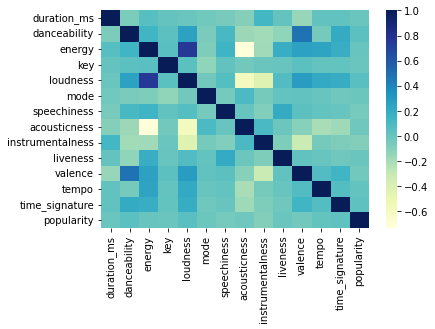

In [8]:
# Looking at the correlation between the numerical features of the dataset:

from pandas.plotting import scatter_matrix

df_num_y=df_num
df_num_y['popularity']=y
corr_mat= df_num_y.corr()

dataplot = sns.heatmap(corr_mat, cmap="YlGnBu")

Above, we can see the correlation matric of the dataset. In genreal, we can see that correlations are low. We few exceptions, we have that there exists a strong relationship between loudness and energy, with a relatively strong relationship between valence and daceability. There also exists a relatively strong negative correlation between energy and acousticness. 

We stated before that some of the variables were derived as products of the other variables. This could potentially explain the relationships shown above. Of course, the other variables are not necessarily related to each other, as you might think that the tempo would have no effect on the pitch of a song, we might have expected slightly more relation between something like valence and mode, but the algorithm chosen to generate this was likely created by somebody who understands music better than us. So we choose not to question this. 

# Let's see if we can cluster this data using k-means and the original number of track genre's.

In [9]:
#Creating a dataset with boolian vlaue for 'explicit' and no 'track genre'

df_kmeans=df_num
df_kmeans['explicit']=df['explicit']

df_kmeans['explicit'].replace(True,1, inplace=True)
df_kmeans['explicit'].replace(False,0,inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_12568\2408174023.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans['explicit']=df['explicit']
C:\Users\hp\AppData\Local\Temp\ipykernel_12568\2408174023.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans['explicit'].replace(True,1, inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_12568\2408174023.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [10]:
# Remember to scale for k-means clustering of course.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scal= scaler.fit_transform(df_kmeans)
df_scal=pd.DataFrame(scal,columns=df_kmeans.columns)

In [11]:
# First let's try and cluster these values with all of the columns involved.

import time
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

k = len(df['track_genre'].unique())
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=15) 

start_time= time.time()
y_pred= kmeans.fit_predict(df_scal)
end_time = time.time()

print(f"Completed in {end_time-start_time} seconds")

Completed in 200.80859756469727 seconds


In [12]:
# Check how well this worked for us.

df_clusters= pd.DataFrame(y_pred,columns=['cluster'])
df_clusters['track_genre']=df['track_genre']

df_clusters['num_genre'] = pd.factorize(df_clusters['track_genre'])[0] + 1
df_clusters.corr()

,cluster,num_genre
cluster,1.000000,-0.018649
num_genre,-0.018649,1.000000


In [13]:
# Let's try to find the variable most highly correlated to the track genre
# that we have ordinally enoded here

df_temp= df_scal

df_temp['num_genre'] = pd.factorize(df['track_genre'])[0] + 1

scal2= scaler.fit_transform(df_temp)

df_temp2=pd.DataFrame(scal2,columns=df_temp.columns)

genre_cors=df_temp2.corr()['num_genre']
genre_cors

threshold_cor=0.03

important_cols=[]

for i in range(len(genre_cors)):
    if(abs(genre_cors[i])>=threshold_cor):
        important_cols.append(genre_cors.index[i])
        
important_cols=important_cols[:-1]

df_to_cluster = df_scal[important_cols]

In [14]:
# Do the clustering with these varibales take into consideration performance
# and time taken!

k = len(df['track_genre'].unique())
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=15) 

start_time= time.time()
y_pred= kmeans.fit_predict(df_to_cluster)
end_time = time.time()

print(f"Completed in {end_time-start_time} seconds")

Completed in 183.250483751297 seconds


In [15]:
# check it's performance 

df_clusters= pd.DataFrame(y_pred,columns=['cluster'])
df_clusters['track_genre']=df['track_genre']

df_clusters['num_genre'] = pd.factorize(df_clusters['track_genre'])[0] + 1
df_clusters.corr()

,cluster,num_genre
cluster,1.000000,0.005084
num_genre,0.005084,1.000000


In [16]:
# Generate a PCA of the data. And then scale it 

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca=pd.DataFrame(pca.fit_transform(df_kmeans),columns=['pca1','pca2'])
df_pca= scaler.fit_transform(df_pca)

In [17]:
# Attempt the clustering using the top two pca values

k = len(df['track_genre'].unique())
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=15) 

start_time= time.time()
y_pred= kmeans.fit_predict(df_pca)
end_time = time.time()

print(f"Completed in {end_time-start_time} seconds")

Completed in 54.52541422843933 seconds


In [18]:
# Checking the performance

df_clusters= pd.DataFrame(y_pred,columns=['cluster'])
df_clusters['track_genre']=df['track_genre']

df_clusters['num_genre'] = pd.factorize(df_clusters['track_genre'])[0] + 1
df_clusters.corr()

,cluster,num_genre
cluster,1.000000,0.001819
num_genre,0.001819,1.000000


## Our interpretation of the results

K means clustering here did not work nicely for us. To explain this, we should turn to the EDA. We noticed in the EDA that the data contained a lot of features that were repeated, but for the track genre. This means that if we were to cluster on these track genre's we would likely find a new number of unique track genres. This could be the solution to our issue, as our choice of k lead to poor silhouette scores for the clusters, which might mean that our cluster overlap and therefore the algorithm was not well parameterised. We can investigate this below. 


# Expand on this

In [19]:
#Since we know that there are repeated track id's let's group by this variable, as it is supposed to be unique.

df_scores=df.groupby('track_id').max()
concatenated = df.groupby('track_id')['track_genre'].agg(lambda x: ','.join(map(str, x)))

df_scores['track_genre']=concatenated
df_scores
print(f"So we can see that out of {len(df_scores.track_genre)} songs, there actually exist {len(df_scores.track_genre.unique())} unique track genres as opposed to the 114 that we initially saw \n \nThis means we would need k={len(df_scores.track_genre.unique())} for our k means clustering to have a chance of working")

So we can see that out of 89741 songs, there actually exist 1547 unique track genres as opposed to the 114 that we initially saw 
 
This means we would need k=1547 for our k means clustering to have a chance of working


In [20]:
# Let's check the null values now that we have grouped the data together. 
df_scores.isna().sum()
#Still nan values, Becasue they are so few and minimal values, we would suggest we simply drop these rows that contain these. 
df_scores.dropna(inplace=True)

We will work with this dataset for the prediction, rather than the original one, as the original one essentially contains a lot of repeated datapoints with the exception of one column. So we thought it would be worth while saving the dataset to work with later

In [21]:
# Saving the new datset

df_scores.to_csv(path+'Grouped_dataset.csv')

# Continuing the EDA for the prediction task. 

In [22]:
# Defining a plotting function to look at how gausian our data is.

import scipy.stats as stats

def diag_plot(df,variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    df[variable].hist()
    
    plt.subplot(1,2,2)
    stats.probplot(df[variable],dist='norm',plot=plt)
    
    plt.show();

C:\Users\hp\AppData\Local\Temp\ipykernel_12568\1154630715.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['artists']=df_scores['artists']


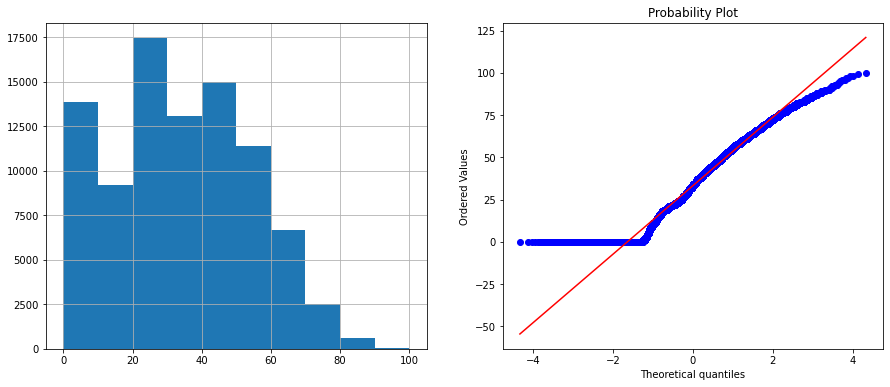

In [23]:
# Plotting our target varibale along with it's q plot to look at how close 
# it is to gaussian

df_scores=pd.read_csv(path+'Grouped_dataset.csv')
df_new=df_scores[df_scores.columns[4:]]
df_new['artists']=df_scores['artists']
df_scores=pd.read_csv(path+'Grouped_dataset.csv')
diag_plot(df_new,'popularity')

From the above, we can see that the y varibale does not follow a Gaussian distribution very well, we may be able to apply some transfomrations to the data in order to try help it 'act' more Gaussian. 

As we can see, the data is quite highly zero skewed, so our first thought here is to apply a mean imputation on the zeros of the target features. We assume that the data may have been missing for these values, and thus we should choose to impute it. We chose mean imputation becasue we want to try and preserve the mean and force a more gaussian-like distribution on the dataset. 

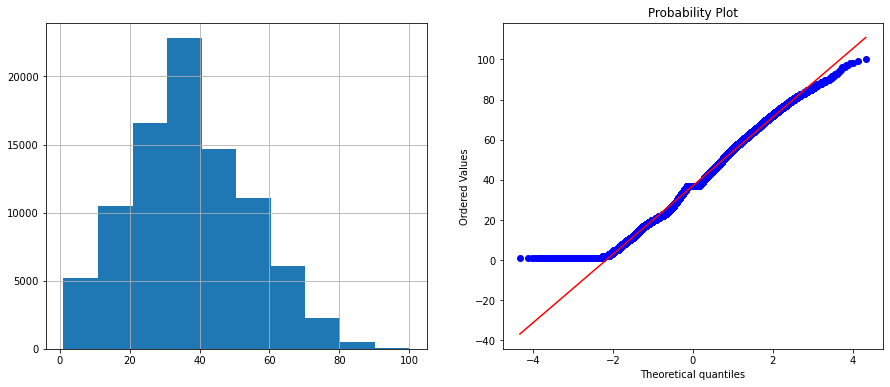

In [24]:
# Applying mean imputation to the data

mean = np.mean(df_new[df_new['popularity'] != 0]['popularity'])
df_new.loc[df_new['popularity'] == 0, 'popularity'] = mean

diag_plot(df_new,'popularity')

This looks a lot more Gaussian to us. We may be able to apply some or other box-cox transformation to the data to make it even more Gaussian! let's try. 

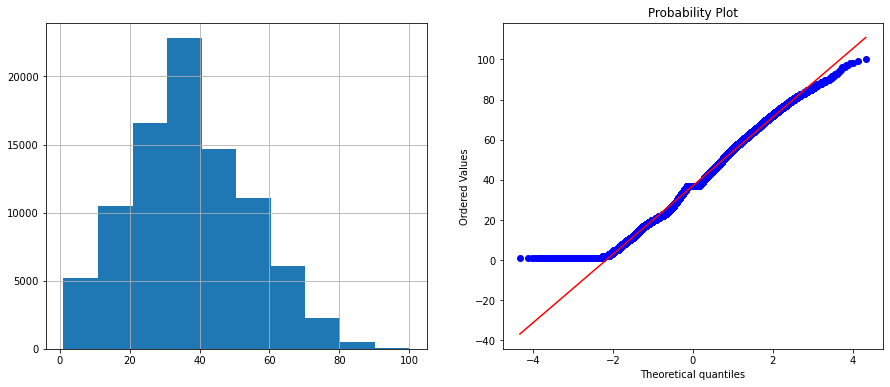

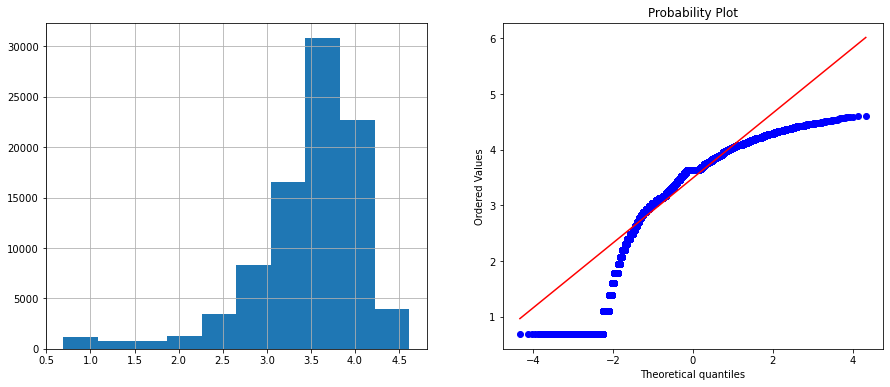

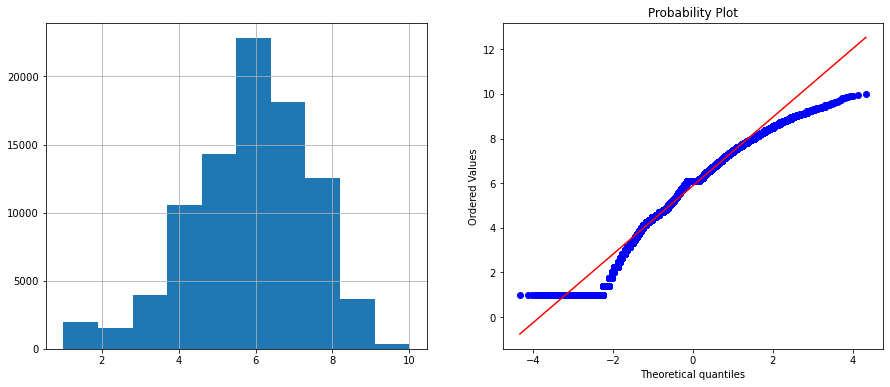

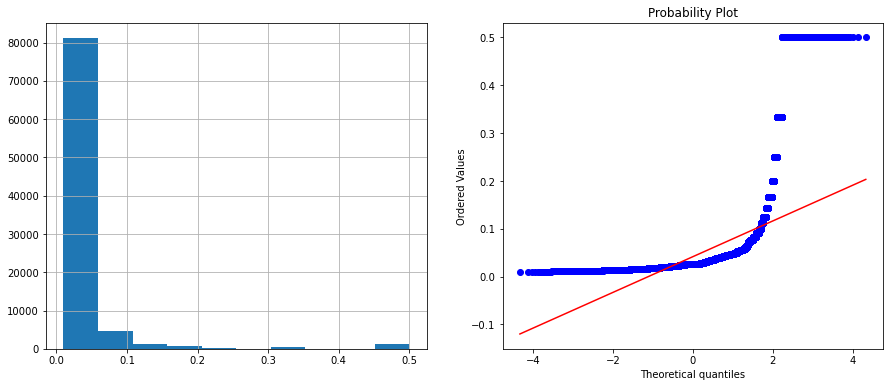

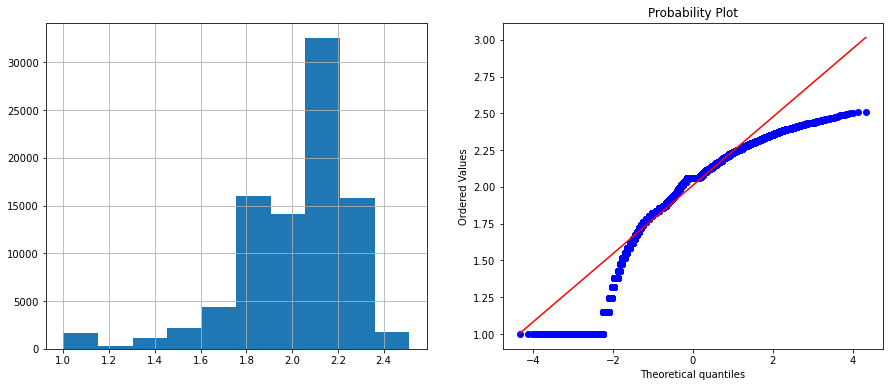

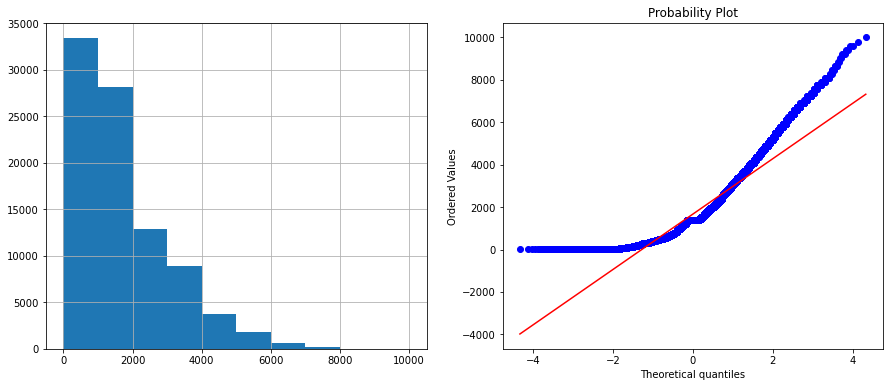

In [25]:
df_new['pop_log'] = np.log(df_new['popularity']+1)
df_new['pop_sqrt'] = np.sqrt(df_new['popularity'])
df_new['pop_rec']= 1/(df_new['popularity']+1)
df_new['pop_exp']= df_new['popularity']**(1/5)
df_new['pop_exp2']= df_new['popularity']**(2)

diag_plot(df_new,'popularity')
diag_plot(df_new,'pop_log')
diag_plot(df_new,'pop_sqrt')
diag_plot(df_new,'pop_rec')
diag_plot(df_new,'pop_exp')
diag_plot(df_new,'pop_exp2')

Unfortunately, this did not work for us. So we will work simpy with the zero transformed data. 

In [26]:
# Let's collect all of the numerical data points to plot the relationships
# between the feautres and the y variable. 

df_new2= df_new[df_new.columns[1:-5]]
df_new2.drop(['track_genre','mode','explicit','time_signature'], axis=1,inplace=True)

df_new2

C:\Users\hp\AppData\Local\Temp\ipykernel_12568\3724449545.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new2.drop(['track_genre','mode','explicit','time_signature'], axis=1,inplace=True)


,popularity,duration_ms,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artists
0,44.0,160725,0.910,0.37400,8,-9.844,0.1990,0.075700,0.00301,0.1540,0.432,104.042,Rill
1,47.0,322933,0.269,0.51600,0,-7.361,0.0366,0.406000,0.00000,0.1170,0.341,178.174,Glee Cast
2,22.0,515360,0.686,0.56000,5,-13.264,0.0462,0.001140,0.18100,0.1110,0.108,119.997,Paul Kalkbrenner;Pig&Dan
3,62.0,190203,0.679,0.77000,0,-3.537,0.1900,0.058300,0.00000,0.0825,0.839,161.721,Jordan Sandhu
4,19.0,331240,0.519,0.43100,6,-13.606,0.0291,0.000964,0.72000,0.0916,0.234,129.971,Paul Kalkbrenner
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89735,56.0,325156,0.766,0.38200,7,-11.464,0.0324,0.698000,0.00143,0.1570,0.672,119.992,Haricharan;Gopi Sundar
89736,23.0,109573,0.529,0.00879,10,-32.266,0.0587,0.996000,0.95900,0.0916,0.510,82.694,Piano Genie
89737,61.0,260573,0.423,0.36000,3,-9.458,0.0372,0.728000,0.00000,0.1050,0.291,130.576,Eric Chou
89738,54.0,234300,0.649,0.83400,10,-11.430,0.0397,0.268000,0.93200,0.0974,0.150,125.004,Stereoclip


In [27]:
# Create a funciton ot allow us to see the relationship between the features
# and the target along with the feature's distrubution

def y_self(df,variable):
    
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    sns.scatterplot(data= df_new2,y='popularity',x=i)
    
    plt.subplot(1,2,2)
    df[variable].hist()
    
    plt.show();

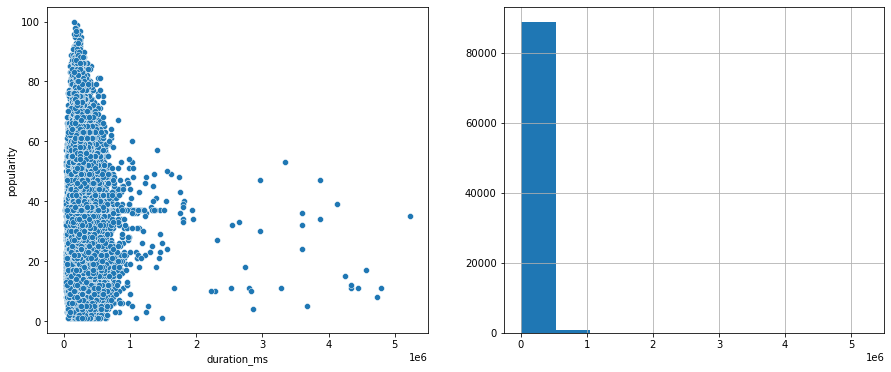

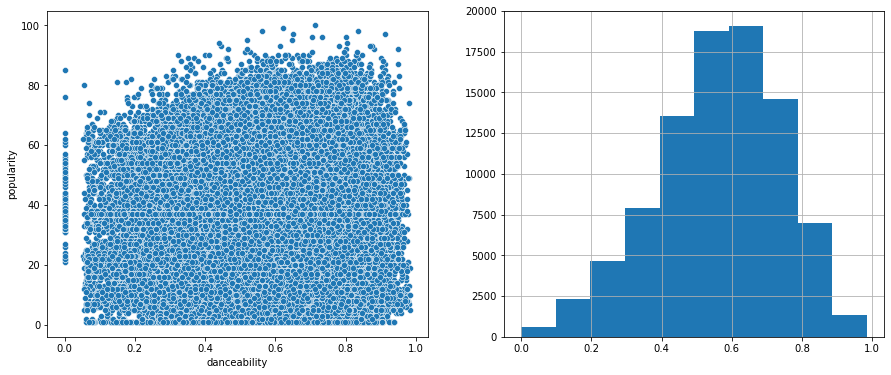

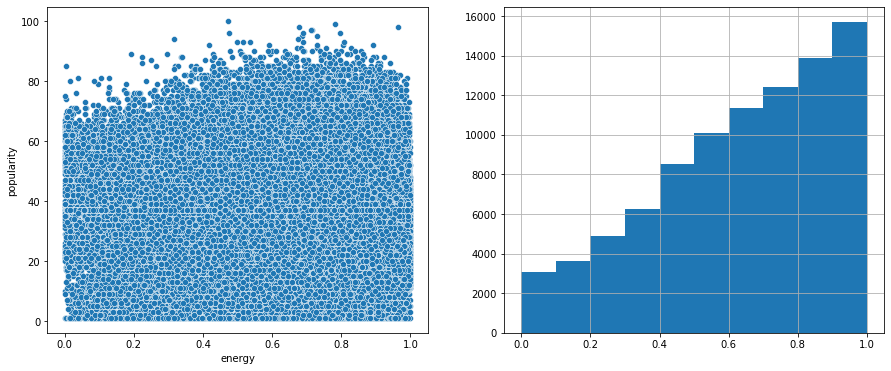

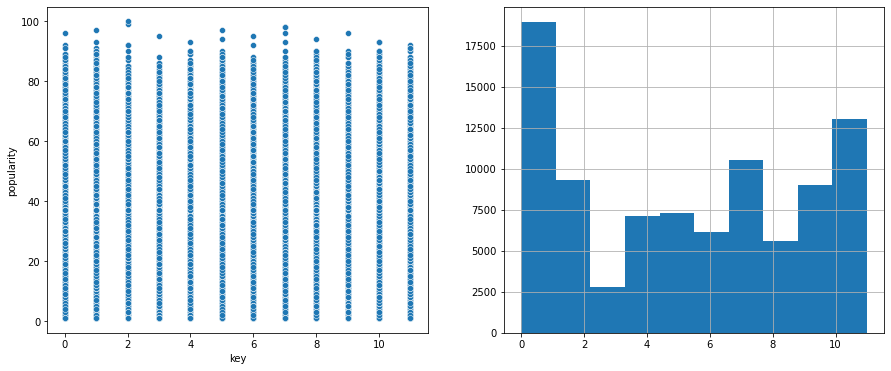

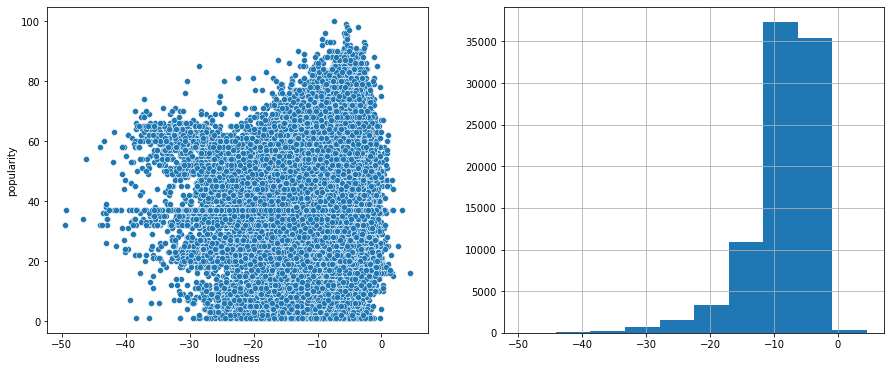

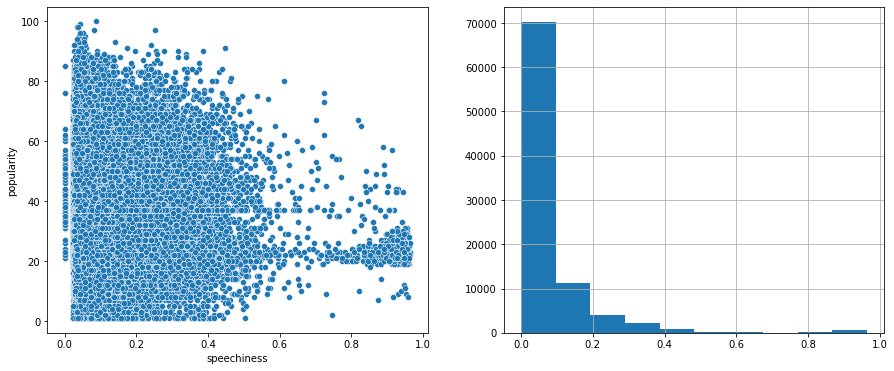

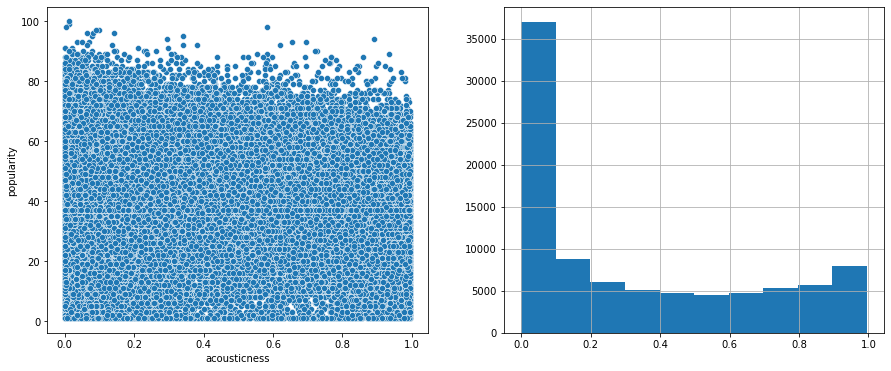

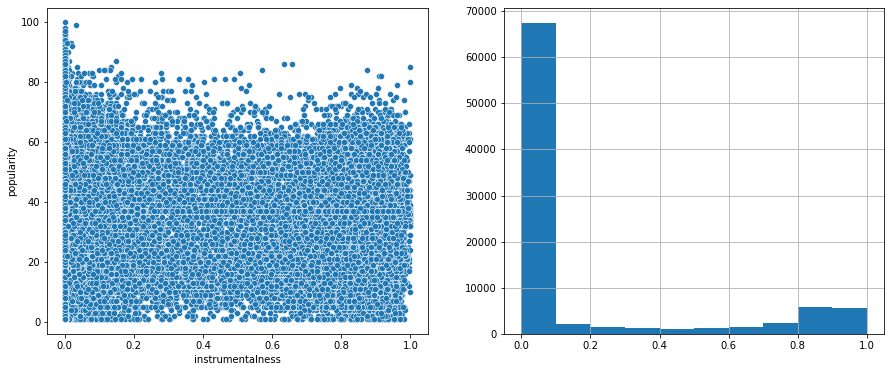

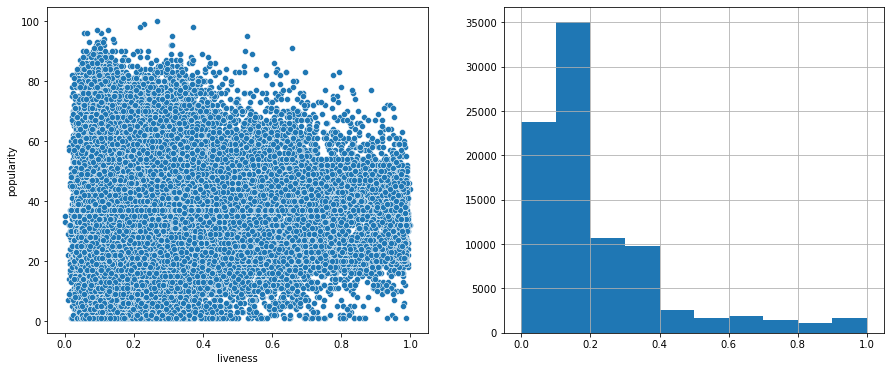

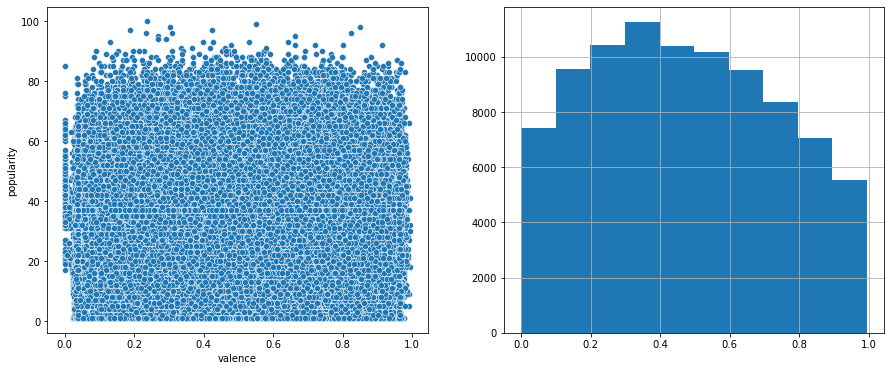

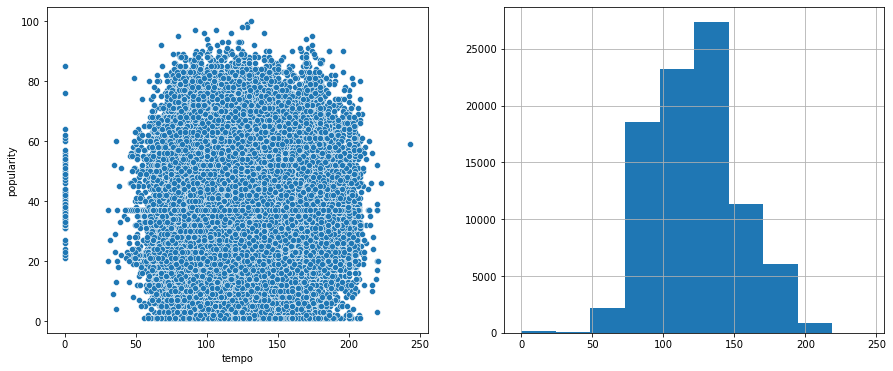

In [28]:
#Plot the each feature against the target and look at their distributions

cols = list(df_new2.columns)
cols.remove('artists')

for i in cols[1:]:
    y_self(df_new2,i)

Looking at the distribtions above, we see that the features are in genreal not normally distributed and there exist no linear(or perceiveable) relationship between the features and the target feature. In fact, these relationships look almost uniformally distributed.

This means that linear regression is out of the question, and we should try to solve this with a more complex algorithm. Enter, the neural networks. 

In [29]:
#Let's see if the grouping has affected the correlation. 

y=df['popularity']
df_num2=df_scores[num]
df_nn2=df_scores[non_num]

df_num2.describe()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,8.974000e+04,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000
mean,2.291444e+05,0.562166,0.634458,5.283530,-8.498994,0.636973,0.087442,0.328285,0.173415,0.216971,0.469474,122.058134,3.897426
std,1.129458e+05,0.176692,0.256606,3.559912,5.221518,0.480875,0.113278,0.338321,0.323849,0.194885,0.262864,30.117651,0.453437
min,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.730400e+05,0.450000,0.457000,2.000000,-10.322250,0.000000,0.036000,0.017100,0.000000,0.098200,0.249000,99.262750,4.000000
50%,2.132955e+05,0.576000,0.676000,5.000000,-7.185000,1.000000,0.048900,0.188000,0.000058,0.132000,0.457000,122.013000,4.000000
75%,2.642930e+05,0.692000,0.853000,8.000000,-5.108000,1.000000,0.085900,0.625000,0.097625,0.279000,0.682000,140.077000,4.000000
max,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


C:\Users\hp\AppData\Local\Temp\ipykernel_12568\4118859466.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num_y2['popularity']= y2


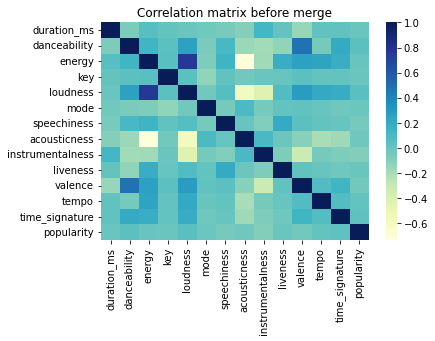

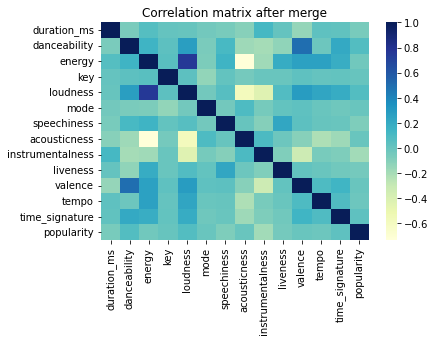

In [30]:
#Let's see if the grouping has affected the correlation matrix. 

cols2=['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre']

num2=[ 'duration_ms','danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       ]
non_num2=[ 'explicit', 'track_genre']


y2= df_new['popularity']
df_num2= df_new[num2]


df_num_y2=df_num2
df_num_y2['popularity']= y2
corr_mat2 = df_num_y2.corr()

dataplot = sns.heatmap(corr_mat, cmap="YlGnBu")
plt.title('Correlation matrix before merge')
plt.show()

dataplot2 = sns.heatmap(corr_mat2, cmap="YlGnBu")
plt.title('Correlation matrix after merge')
plt.show()

This makes just about no difference. So we will have to start to thing a little bit more outside the box. Possibly think about how to use the categorical varibales. We all know that the genre and artist would influence the popularity score of a song. So we can explore that.

In [31]:
df_new['track_genre'].value_counts()

tango                          999
sleep                          997
study                          996
idm                            988
salsa                          986
                              ... 
mpb,pagode,reggae,samba          1
acoustic,blues,j-pop             1
electronic,psych-rock            1
ambient,indie-pop,indie,pop      1
alt-rock,blues,rock              1
Name: track_genre, Length: 1547, dtype: int64

If we look at track genre, and we think about how we can encode it. There are more than 1000 unique kinds of values. These values have varying number of values in them. For example, 'tango' has 999 songs, while 'alt-rock,blues,rock' has only one value. I propose that we split this into three categories. 'pop'(3) -(all categories that include more than 700 features), 'Alt'(2) -(All categoies that include less than 700 but more than 250 songs) 'indie'(1) the rest.

After playing with this idea, it worked out that having 2 genres actually worked out a bit better than having 3.

In [32]:
# Getting the values following the method above

value_counts = df_new['track_genre'].value_counts()

upper = 700
# lower = 250

pop = value_counts[value_counts > upper].index.tolist()
# alt = value_counts[(value_counts > lower) & (value_counts<= upper)].index.tolist()
# indie = value_counts[value_counts<=lower].index.tolist()

Index(['track_name', 'popularity', 'duration_ms', 'explicit', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre', 'artists', 'pop_log', 'pop_sqrt', 'pop_rec', 'pop_exp',
       'pop_exp2', 'our_genre'],
      dtype='object')

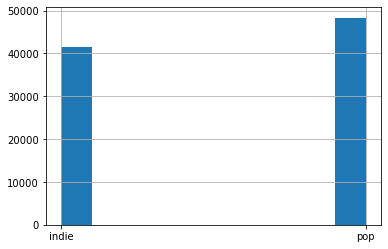

In [33]:
#Let's create a new column in our dataframe to containing the track_genres as we see them.

# df_scores['our_genre']= df_scores['track_genre'].apply(lambda x:'pop' if x in pop else('alt' if x in alt else 'indie'))
df_new['our_genre']= df_new['track_genre'].apply(lambda x:'pop' if x in pop else'indie')

df_new['our_genre'].hist()

df_new.columns

Now we have simplified the track genre for the encoding process. We can this encoding along with the encoding of the entire track_genre values 

In [34]:
#Getting rid of the trasnformations we made of the target feature. And quickly checking in on the results of our new clusters

to_drop=['pop_log','pop_sqrt','pop_rec','pop_exp','pop_exp2']
df_new.drop(to_drop, axis=1, inplace= True)
df_new

df_new['our_genre'][df_new['popularity']>90].value_counts()

indie    28
Name: our_genre, dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_12568\2816192220.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_v.drop('track_genre', axis=1, inplace =True)
C:\Users\hp\AppData\Local\Temp\ipykernel_12568\2816192220.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_v.our_genre.replace('indie',1, inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_12568\2816192220.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_v.our_genr

<AxesSubplot:>

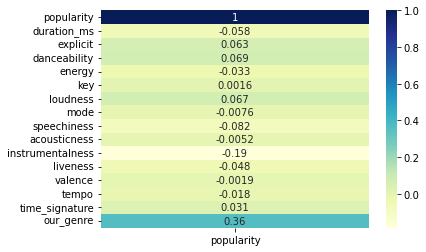

In [35]:
df_v=df_new[df_new.columns[1:]]
df_v.drop('track_genre', axis=1, inplace =True)

df_v.our_genre.replace('indie',1, inplace=True)
df_v.our_genre.replace('pop',0,inplace=True)
df_v.explicit.replace(True,1, inplace=True)
df_v.explicit.replace(False,0,inplace=True)

corr=df_v.corr()

sns.heatmap(corr['popularity'].to_frame(), annot=True,  cmap="YlGnBu")

We can see that the track that we turned into a binary variable holds the highest correlation to the popularity! Thuse, we have found a way to include this varibale into our dataset without having to encode the entire column of over 1500 values. We will work with df_v from here on.

In [36]:
df_v.to_csv(path+'encoded2.csv')

In [37]:
# So, let's see if we can find a nice way to use the artist names without encoding all of the values!
# Let's group by the artist name, and take the average of the artist's popularity.

df_a_pop= df[['artists','popularity']]

df_a_pop=df_a_pop.groupby('artists').mean()

df_a_pop.describe()

,popularity
count,31437.000000
mean,36.517041
std,18.775855
min,0.000000
25%,22.500000
50%,38.000000
75%,50.200000
max,100.000000


In [38]:
# This description is skewed, but the range would still imply,to us that we should attempt to use at least 4 bins for these
# Artists

df_a_pop['artist_bins']= df_a_pop['popularity'].apply(lambda x: 'high' if x>=75 else('medium' if x>=50 else('low' if x>=25 else('poor'))))

high_arts=df_a_pop[df_a_pop['artist_bins']=='high'].index
med_arts=df_a_pop[df_a_pop['artist_bins']=='medium'].index
low_arts=df_a_pop[df_a_pop['artist_bins']=='low'].index
poor_arts=df_a_pop[df_a_pop['artist_bins']=='poor'].index

<AxesSubplot:>

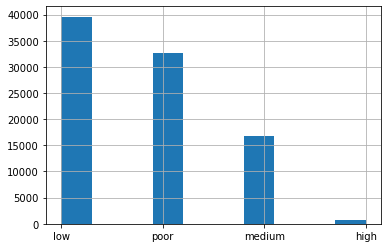

In [39]:
#That gives us our artist bins! now we need to add these bins to our data set, encome, and use them in our nn.

df_new['artist_pop'] = df_new['artists'].apply(lambda x: 'high' if x in high_arts else('medium' if x in med_arts else('low' if x in low_arts else('poor'))))

df_new['artist_pop'].hist()

In [40]:

df_tg_pop= df[['track_genre','popularity']]

df_tg_pop=df_tg_pop.groupby('track_genre').mean()

df_tg_pop.describe()

,popularity
count,114.000000
mean,33.238535
std,11.294789
min,2.210000
25%,25.784000
50%,34.885500
75%,41.124000
max,59.283000


In [41]:
# Here, the max is 59, so we split into two rather 

df_tg_pop['artist_bins']= df_tg_pop['popularity'].apply(lambda x: 'high' if x>=30 else 'medium')

high_genre=df_tg_pop[df_tg_pop['artist_bins']=='high'].index

,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,time_signature,track_genre,artists,our_genre,artist_pop,genre_pop
0,Lolly,44.0,160725,True,0.910,0.37400,8,-9.844,0,0.1990,...,0.00301,0.1540,0.432,104.042,4,german,Rill,indie,low,low
1,It's All Coming Back To Me Now (Glee Cast Vers...,47.0,322933,False,0.269,0.51600,0,-7.361,1,0.0366,...,0.00000,0.1170,0.341,178.174,4,club,Glee Cast,pop,low,high
2,Böxig Leise - Pig & Dan Remix,22.0,515360,False,0.686,0.56000,5,-13.264,0,0.0462,...,0.18100,0.1110,0.108,119.997,4,minimal-techno,Paul Kalkbrenner;Pig&Dan,indie,poor,high
3,Teeje Week,62.0,190203,False,0.679,0.77000,0,-3.537,1,0.1900,...,0.00000,0.0825,0.839,161.721,4,hip-hop,Jordan Sandhu,indie,medium,high
4,Tief,19.0,331240,False,0.519,0.43100,6,-13.606,0,0.0291,...,0.72000,0.0916,0.234,129.971,4,minimal-techno,Paul Kalkbrenner,indie,low,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89735,"Aethu Kari Raavilum - From ""Bangalore Days""",56.0,325156,False,0.766,0.38200,7,-11.464,0,0.0324,...,0.00143,0.1570,0.672,119.992,4,pop-film,Haricharan;Gopi Sundar,indie,medium,high
89736,"Two Worlds (From ""Tarzan"")",23.0,109573,False,0.529,0.00879,10,-32.266,1,0.0587,...,0.95900,0.0916,0.510,82.694,4,disney,Piano Genie,pop,poor,low
89737,以後別做朋友,61.0,260573,False,0.423,0.36000,3,-9.458,1,0.0372,...,0.00000,0.1050,0.291,130.576,4,mandopop,Eric Chou,pop,medium,high
89738,Sunset Drive,54.0,234300,False,0.649,0.83400,10,-11.430,0,0.0397,...,0.93200,0.0974,0.150,125.004,4,electronic,Stereoclip,indie,medium,high


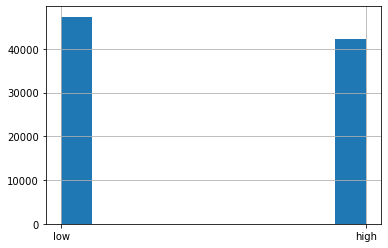

In [42]:
#Creating another version of the track genre bsed on their mean popularity.

df_new['genre_pop'] = df_new['track_genre'].apply(lambda x: 'high' if x in high_genre else 'low')

df_new['genre_pop'].hist()

df_new

In [43]:
# Let's now choose our varibales, encode them, scale them and then save the dataset as a whole!

not_keep= ['track_name','track_genre','artists']

df_new.columns

df_fin=df_new.drop(not_keep,axis=1)

df_fin['explicit'].replace([True,False],[1,0], inplace=True)
df_fin

df_encoded = pd.get_dummies(df_fin, columns=['genre_pop', 'artist_pop','our_genre'])
df_encoded

scale = scaler.fit_transform(df_encoded[df_encoded.columns[1:15]])


df= pd.DataFrame(scale, columns=df_encoded.columns[1:15] )

df[df_encoded.columns[15:]]=df_encoded[df_encoded.columns[15:]]

df['explicit']=df_encoded['explicit'] 
df['popularity']=df_encoded['popularity']

df.to_csv(path+'final_dataset.csv')
df

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,time_signature,genre_pop_high,genre_pop_low,artist_pop_high,artist_pop_low,artist_pop_medium,artist_pop_poor,our_genre_indie,our_genre_pop,popularity
0,-0.605775,1,1.968598,-1.015017,0.763076,-0.257591,-1.324621,0.984821,-0.746589,-0.526190,...,0.226216,0,1,0,1,0,0,1,0,44.0
1,0.830391,0,-1.659203,-0.461638,-1.484183,0.217944,0.754933,-0.448832,0.229710,-0.535485,...,0.226216,1,0,0,1,0,0,0,1,47.0
2,2.534112,0,0.700848,-0.290168,-0.079646,-0.912576,-1.324621,-0.364084,-0.966973,0.023420,...,0.226216,1,0,0,0,0,1,1,0,22.0
3,-0.344781,0,0.661231,0.528211,-1.484183,0.950303,0.754933,0.905370,-0.798020,-0.535485,...,0.226216,1,0,0,0,1,0,1,0,62.0
4,0.903940,0,-0.244304,-0.792886,0.201262,-0.978075,-1.324621,-0.515041,-0.967493,1.687784,...,0.226216,1,0,0,1,0,0,1,0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89735,0.850073,0,1.153616,-0.983841,0.482169,-0.567847,-1.324621,-0.485909,1.092801,-0.531069,...,0.226216,1,0,0,0,1,0,1,0,56.0
89736,-1.058668,0,-0.187708,-2.438256,1.324891,-4.551768,0.754933,-0.253735,1.973627,2.425786,...,0.226216,0,1,0,0,0,1,0,1,23.0
89737,0.278265,0,-0.787625,-1.069576,-0.641461,-0.183665,0.754933,-0.443535,1.181475,-0.535485,...,0.226216,1,0,0,0,1,0,0,1,61.0
89738,0.045647,0,0.491443,0.777622,1.324891,-0.561335,-1.324621,-0.421465,-0.178190,2.342413,...,0.226216,1,0,0,0,1,0,1,0,54.0


In [44]:
len(df.columns)

23

In [45]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Split the dataset into input features (X) and target labels (y)
X = df.iloc[:, 0:22].values
y = df['popularity']

# Perform feature scaling
sc = StandardScaler()
X = sc.fit_transform(X)

# Define the number of folds for cross-validation
num_folds = 5

# Define a list to store the cross-validation scores
fold_scores = []

# Perform cross-validation
kfold = KFold(n_splits=num_folds, shuffle=True)
for train_indices, val_indices in kfold.split(X):
    # Split the data into training and validation sets
    X_train, X_val = X[train_indices], X[val_indices]
    y_train, y_val = y[train_indices], y[val_indices]

    # Initialize the ANN
    classifier = Sequential()
    
    # Add the input layer and the first hidden layer
    classifier.add(Dense(20, kernel_initializer='uniform', activation='relu'))
    
    # Add the second hidden layer
    classifier.add(Dense(16, kernel_initializer='uniform', activation='relu'))
    
    # Add the output layer
    classifier.add(Dense(1, kernel_initializer='uniform', activation='relu'))
    
    # Compile the ANN
    classifier.compile(optimizer='adam', loss='mse', metrics=['mse'])
    
    # Fit the ANN to the training set
    classifier.fit(X_train, y_train, batch_size=20, epochs=10, verbose=0)
    
    # Evaluate the ANN on the validation set
    _, mse = classifier.evaluate(X_val, y_val, verbose=0)
    
    # Store the validation MSE score in the fold_scores list
    fold_scores.append(mse)

# Calculate and print the average MSE across all folds
avg_mse = np.mean(fold_scores)
print("Average MSE:", avg_mse)


Average MSE: 118.71992645263671


In [46]:
y_pred=classifier.predict(X_val)

561/561 [==============================] - 0s 650us/step


In [47]:
from sklearn.metrics import mean_squared_error, r2_score


mse = mean_squared_error(y_val, y_pred)
print(f"Mean squared error: {mse:.2f}")
ra2 = r2_score(y_val, y_pred)
print('R2 score:', ra2)

Mean squared error: 116.07
R2 score: 0.6050970082441767
